<a href="https://colab.research.google.com/github/abrarzayedgithub/abrar123456-/blob/main/assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
import cv2


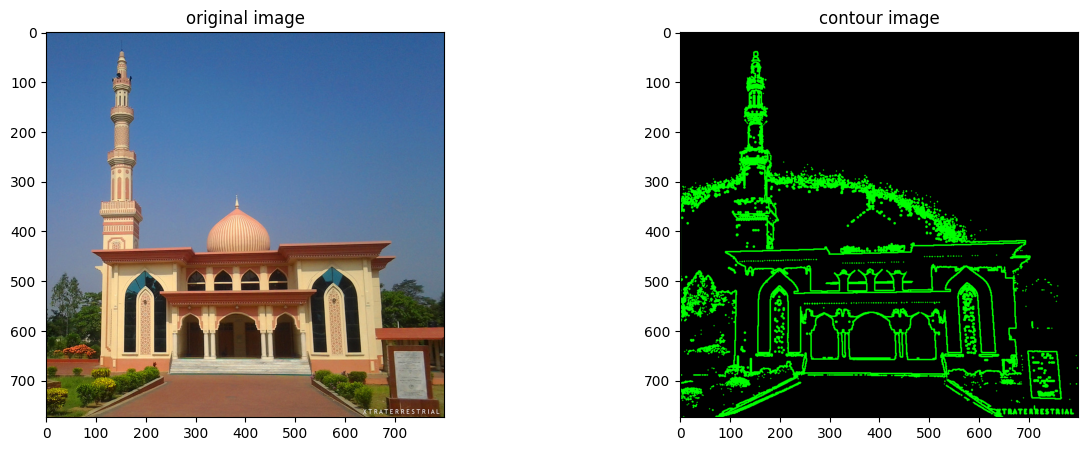

In [ ]:
#load image
image = cv2.imread('/content/drive/MyDrive/iiuc mosque.jpg')
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
rat,thresh = cv2.threshold(gray_img,127,255,0)

#find contour
contours_simple,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contour_image_simple = np.zeros_like(image)
#draw contours on the blank image
cv2.drawContours(contour_image_simple,contours_simple,-1,(0,255,0),2)

#display the image
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('contour image')
plt.imshow(cv2.cvtColor(contour_image_simple,cv2.COLOR_BGR2RGB))

plt.show()



<ipython-input-22-656ce8166149>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yleft = int((-x0*vy/vx)+y0)
<ipython-input-22-656ce8166149>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yright= int(((cols-x0) * vy / vx)+y0)
<ipython-input-22-656ce8166149>:41: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


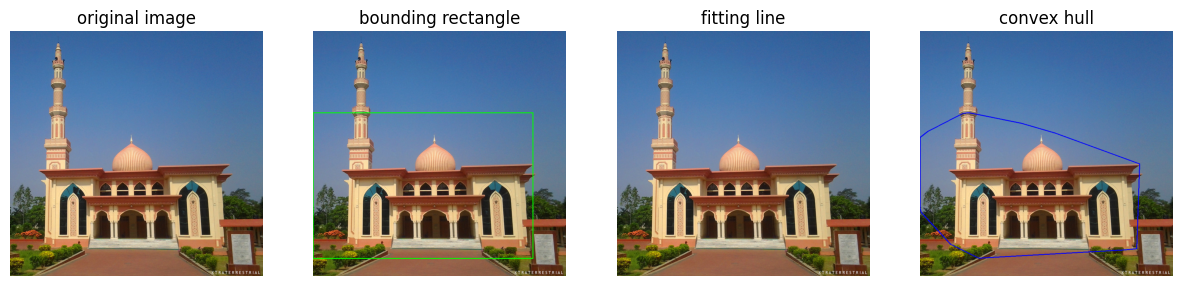

In [ ]:
image = cv2.imread('/content/drive/MyDrive/iiuc mosque.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
rat,thresh = cv2.threshold(gray_image,127,255,0)

contours_simple,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#create copies of the imagw
original = image.copy()
bounding_rectangle = image.copy()
fitting_line = image.copy()
convex_hull = image.copy()
contour_approximation = image.copy()
rotated_rectangle = image.copy()
min_enclosing_circle = image.copy()

#apply contour on the imagee
for contour in contours_simple:
  largest_contour = max(contours_simple,key=cv2.contourArea)
  #bounding rectangle
  x,y,w,h = cv2.boundingRect(largest_contour)
  cv2.rectangle(bounding_rectangle,(x,y),(x+w,y+h),(0,255,0),2)
  #convex hull
  hull = cv2.convexHull(largest_contour)
  cv2.drawContours(convex_hull,[hull],0,(255,0,0),2)
  #fitting a line
  [vx,vy,x0,y0] = cv2.fitLine(largest_contour,cv2.DIST_L2,0,0.01,0.01)
  rows,cols = image.shape[:2]
  if vx != 0:
    yleft = int((-x0*vy/vx)+y0)
    yright= int(((cols-x0) * vy / vx)+y0)
    cv2.line(image,(cols-1,yright),(0,yleft),(0,0,255),2)

  #contour approximation
  epsilon = 0.01 * cv2.arcLength(largest_contour,True)
  approx = cv2.approxPolyDP(largest_contour,epsilon,True)
  cv2.drawContours(contour_approximation,[approx],0,(255,0,255),2)

  #rotated rectangle
  rect = cv2.minAreaRect(largest_contour)
  box = cv2.boxPoints(rect)
  box = np.int0(box)
  cv2.drawContours(rotated_rectangle,[box],0,(255,255,0),2)

  #minimum enclosing circle
  (x,y),radius = cv2.minEnclosingCircle(largest_contour)
  center = (int(x),int(y))
  radius = int(radius)
  cv2.circle(min_enclosing_circle,center,radius,(0,255,255),2)

#display the image
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.title('original image')
plt.imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,4,2)
plt.title('bounding rectangle')
plt.imshow(cv2.cvtColor(bounding_rectangle,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,4,3)
plt.title('fitting line')
plt.imshow(cv2.cvtColor(fitting_line ,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,4,4)
plt.title('convex hull')
plt.imshow(cv2.cvtColor(convex_hull,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()